In [204]:
import pandas as pd
from tqdm import tqdm
import numpy as np
import glob
import matplotlib.pyplot as plt
#import seaborn as sns

In [205]:
tweetFiles = glob.glob("../twitterJJ./Tweets./gz_data/*jsonl*")
tweetFiles

['../twitterJJ./Tweets./gz_data\\tweets.jsonl.gz',
 '../twitterJJ./Tweets./gz_data\\tweets10.jsonl.gz',
 '../twitterJJ./Tweets./gz_data\\tweets11.jsonl.gz',
 '../twitterJJ./Tweets./gz_data\\tweets12.jsonl.gz',
 '../twitterJJ./Tweets./gz_data\\tweets13.jsonl.gz',
 '../twitterJJ./Tweets./gz_data\\tweets14.jsonl.gz',
 '../twitterJJ./Tweets./gz_data\\tweets15.jsonl.gz',
 '../twitterJJ./Tweets./gz_data\\tweets16.jsonl.gz',
 '../twitterJJ./Tweets./gz_data\\tweets2.jsonl.gz',
 '../twitterJJ./Tweets./gz_data\\tweets3.jsonl.gz',
 '../twitterJJ./Tweets./gz_data\\tweets4.jsonl.gz',
 '../twitterJJ./Tweets./gz_data\\tweets5.jsonl.gz',
 '../twitterJJ./Tweets./gz_data\\tweets6.jsonl.gz',
 '../twitterJJ./Tweets./gz_data\\tweets7.jsonl.gz',
 '../twitterJJ./Tweets./gz_data\\tweets8.jsonl.gz',
 '../twitterJJ./Tweets./gz_data\\tweets9.jsonl.gz']

In [206]:
df = []
for f in tqdm(tweetFiles):
    df.append(pd.read_json(f, lines=True))
df = pd.concat(df)
df = df.drop_duplicates(subset=['id'])
print('DF shape: {}'.format(df.shape))
df['datetime'] = pd.to_datetime(df.created_at)
df['ymd'] = df.datetime.dt.date
df['month'] = df.datetime.dt.month
df['day'] = df.datetime.dt.day
df['hour'] = df.datetime.dt.hour
df['period'] = np.floor(df.hour / 24 * 4) #0: night (0 - 5), 1: morning (6 - 11), 2: afternoon (12 - 17), 3: evening (18 - 23)


100%|██████████| 16/16 [00:29<00:00,  1.84s/it]

DF shape: (130191, 32)


In [207]:
df = df.loc[df.ymd >= pd.to_datetime('2018-03-04').date()]
df.reset_index(drop=True, inplace=True)
df

,created_at,id,id_str,full_text,truncated,display_text_range,entities,source,in_reply_to_status_id,in_reply_to_status_id_str,...,quoted_status_id_str,quoted_status_permalink,quoted_status,scopes,datetime,ymd,month,day,hour,period
0,2018-03-15 23:53:27+00:00,974433424269303808,974433424269303808,"RT @tedtully: Before the Skripal poisoning, Ru...",False,"[0, 144]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/#!/download/ipad"" ...",NaN,NaN,...,NaN,NaN,NaN,NaN,2018-03-15 23:53:27+00:00,2018-03-15,3,15,23,3.0
1,2018-03-15 23:53:31+00:00,974433441843499013,974433441843499008,RT @dialectica6: Dying from Novichok exposure ...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,...,NaN,NaN,NaN,NaN,2018-03-15 23:53:31+00:00,2018-03-15,3,15,23,3.0
2,2018-03-15 23:53:32+00:00,974433447782395904,974433447782395904,Putin ‘extremely concerned’ over UK’s ‘destruc...,False,"[0, 145]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://erased13194958_fkZgnEbT2F.com""...",NaN,NaN,...,NaN,NaN,NaN,NaN,2018-03-15 23:53:32+00:00,2018-03-15,3,15,23,3.0
3,2018-03-15 23:53:35+00:00,974433460650725382,974433460650725376,Last week @newsundayherald reported that #Serg...,False,"[0, 243]","{'hashtags': [{'text': 'SergeiSkripal', 'indic...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,NaN,NaN,NaN,NaN,2018-03-15 23:53:35+00:00,2018-03-15,3,15,23,3.0
4,2018-03-15 23:53:35+00:00,974433460818497542,974433460818497536,RT @cestrianero: Authoritarian leader persecut...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,NaN,NaN,NaN,NaN,2018-03-15 23:53:35+00:00,2018-03-15,3,15,23,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130088,2018-03-15 12:19:51+00:00,974258875800211456,974258875800211456,"Affaire #Skripal, tensions 🇬🇧/ 🇷🇺 :\n\nLe secr...",False,"[0, 235]","{'hashtags': [{'text': 'Skripal', 'indices': [...","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",9.742580e+17,9.742580e+17,...,NaN,NaN,NaN,NaN,2018-03-15 12:19:51+00:00,2018-03-15,3,15,12,2.0
130089,2018-04-14 06:18:44+00:00,985039631963090944,985039631963090944,Además de la transmisión en Periscope pueden v...,False,"[0, 271]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",9.850362e+17,9.850362e+17,...,NaN,NaN,NaN,NaN,2018-04-14 06:18:44+00:00,2018-04-14,4,14,6,1.0
130090,2018-04-24 00:12:16+00:00,988571289332858880,988571289332858880,@LenaSakuraBlume @tagesschau Julia hat sich zu...,False,"[29, 84]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/android"" ...",9.884840e+17,9.884840e+17,...,NaN,NaN,NaN,NaN,2018-04-24 00:12:16+00:00,2018-04-24,4,24,0,0.0
130091,2018-04-22 02:27:15+00:00,987880480728141824,987880480728141824,@Mare_Indicum @CL4Syr @ShoebridgeC @MichaKobs ...,False,"[117, 134]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",9.878801e+17,9.878801e+17,...,NaN,NaN,NaN,NaN,2018-04-22 02:27:15+00:00,2018-04-22,4,22,2,0.0


In [208]:
df

,created_at,id,id_str,full_text,truncated,display_text_range,entities,source,in_reply_to_status_id,in_reply_to_status_id_str,...,quoted_status_id_str,quoted_status_permalink,quoted_status,scopes,datetime,ymd,month,day,hour,period
0,2018-03-15 23:53:27+00:00,974433424269303808,974433424269303808,"RT @tedtully: Before the Skripal poisoning, Ru...",False,"[0, 144]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/#!/download/ipad"" ...",NaN,NaN,...,NaN,NaN,NaN,NaN,2018-03-15 23:53:27+00:00,2018-03-15,3,15,23,3.0
1,2018-03-15 23:53:31+00:00,974433441843499013,974433441843499008,RT @dialectica6: Dying from Novichok exposure ...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,...,NaN,NaN,NaN,NaN,2018-03-15 23:53:31+00:00,2018-03-15,3,15,23,3.0
2,2018-03-15 23:53:32+00:00,974433447782395904,974433447782395904,Putin ‘extremely concerned’ over UK’s ‘destruc...,False,"[0, 145]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://erased13194958_fkZgnEbT2F.com""...",NaN,NaN,...,NaN,NaN,NaN,NaN,2018-03-15 23:53:32+00:00,2018-03-15,3,15,23,3.0
3,2018-03-15 23:53:35+00:00,974433460650725382,974433460650725376,Last week @newsundayherald reported that #Serg...,False,"[0, 243]","{'hashtags': [{'text': 'SergeiSkripal', 'indic...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,NaN,NaN,NaN,NaN,2018-03-15 23:53:35+00:00,2018-03-15,3,15,23,3.0
4,2018-03-15 23:53:35+00:00,974433460818497542,974433460818497536,RT @cestrianero: Authoritarian leader persecut...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,NaN,NaN,NaN,NaN,2018-03-15 23:53:35+00:00,2018-03-15,3,15,23,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130088,2018-03-15 12:19:51+00:00,974258875800211456,974258875800211456,"Affaire #Skripal, tensions 🇬🇧/ 🇷🇺 :\n\nLe secr...",False,"[0, 235]","{'hashtags': [{'text': 'Skripal', 'indices': [...","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",9.742580e+17,9.742580e+17,...,NaN,NaN,NaN,NaN,2018-03-15 12:19:51+00:00,2018-03-15,3,15,12,2.0
130089,2018-04-14 06:18:44+00:00,985039631963090944,985039631963090944,Además de la transmisión en Periscope pueden v...,False,"[0, 271]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",9.850362e+17,9.850362e+17,...,NaN,NaN,NaN,NaN,2018-04-14 06:18:44+00:00,2018-04-14,4,14,6,1.0
130090,2018-04-24 00:12:16+00:00,988571289332858880,988571289332858880,@LenaSakuraBlume @tagesschau Julia hat sich zu...,False,"[29, 84]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/android"" ...",9.884840e+17,9.884840e+17,...,NaN,NaN,NaN,NaN,2018-04-24 00:12:16+00:00,2018-04-24,4,24,0,0.0
130091,2018-04-22 02:27:15+00:00,987880480728141824,987880480728141824,@Mare_Indicum @CL4Syr @ShoebridgeC @MichaKobs ...,False,"[117, 134]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",9.878801e+17,9.878801e+17,...,NaN,NaN,NaN,NaN,2018-04-22 02:27:15+00:00,2018-04-22,4,22,2,0.0


In [209]:
df.columns

Index(['created_at', 'id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'source', 'in_reply_to_status_id',
       'in_reply_to_status_id_str', 'in_reply_to_user_id',
       'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo',
       'coordinates', 'place', 'contributors', 'retweeted_status',
       'is_quote_status', 'retweet_count', 'favorite_count', 'favorited',
       'retweeted', 'lang', 'possibly_sensitive', 'extended_entities',
       'quoted_status_id', 'quoted_status_id_str', 'quoted_status_permalink',
       'quoted_status', 'scopes', 'datetime', 'ymd', 'month', 'day', 'hour',
       'period'],
      dtype='object')

In [210]:
df.iloc[0]["id_str"]

974433424269303808

In [211]:
df["author_sname"] = df["user"].apply(lambda x: x["screen_name"])

In [212]:
df["author_sname"].nunique() * 0.01

600.04

In [213]:
author_map = { name: f"U_{i+1:03d}" for i, name in enumerate(df["author_sname"].unique()) }
df["author_sname"] = df["author_sname"].map(author_map)
df["in_reply_to_screen_name"] = df["in_reply_to_screen_name"].map(author_map)
df

,created_at,id,id_str,full_text,truncated,display_text_range,entities,source,in_reply_to_status_id,in_reply_to_status_id_str,...,quoted_status_permalink,quoted_status,scopes,datetime,ymd,month,day,hour,period,author_sname
0,2018-03-15 23:53:27+00:00,974433424269303808,974433424269303808,"RT @tedtully: Before the Skripal poisoning, Ru...",False,"[0, 144]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/#!/download/ipad"" ...",NaN,NaN,...,NaN,NaN,NaN,2018-03-15 23:53:27+00:00,2018-03-15,3,15,23,3.0,U_001
1,2018-03-15 23:53:31+00:00,974433441843499013,974433441843499008,RT @dialectica6: Dying from Novichok exposure ...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,...,NaN,NaN,NaN,2018-03-15 23:53:31+00:00,2018-03-15,3,15,23,3.0,U_002
2,2018-03-15 23:53:32+00:00,974433447782395904,974433447782395904,Putin ‘extremely concerned’ over UK’s ‘destruc...,False,"[0, 145]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://erased13194958_fkZgnEbT2F.com""...",NaN,NaN,...,NaN,NaN,NaN,2018-03-15 23:53:32+00:00,2018-03-15,3,15,23,3.0,U_003
3,2018-03-15 23:53:35+00:00,974433460650725382,974433460650725376,Last week @newsundayherald reported that #Serg...,False,"[0, 243]","{'hashtags': [{'text': 'SergeiSkripal', 'indic...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,NaN,NaN,NaN,2018-03-15 23:53:35+00:00,2018-03-15,3,15,23,3.0,U_004
4,2018-03-15 23:53:35+00:00,974433460818497542,974433460818497536,RT @cestrianero: Authoritarian leader persecut...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,NaN,NaN,NaN,2018-03-15 23:53:35+00:00,2018-03-15,3,15,23,3.0,U_005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130088,2018-03-15 12:19:51+00:00,974258875800211456,974258875800211456,"Affaire #Skripal, tensions 🇬🇧/ 🇷🇺 :\n\nLe secr...",False,"[0, 235]","{'hashtags': [{'text': 'Skripal', 'indices': [...","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",9.742580e+17,9.742580e+17,...,NaN,NaN,NaN,2018-03-15 12:19:51+00:00,2018-03-15,3,15,12,2.0,U_1187
130089,2018-04-14 06:18:44+00:00,985039631963090944,985039631963090944,Además de la transmisión en Periscope pueden v...,False,"[0, 271]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",9.850362e+17,9.850362e+17,...,NaN,NaN,NaN,2018-04-14 06:18:44+00:00,2018-04-14,4,14,6,1.0,U_4370
130090,2018-04-24 00:12:16+00:00,988571289332858880,988571289332858880,@LenaSakuraBlume @tagesschau Julia hat sich zu...,False,"[29, 84]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/android"" ...",9.884840e+17,9.884840e+17,...,NaN,NaN,NaN,2018-04-24 00:12:16+00:00,2018-04-24,4,24,0,0.0,U_18496
130091,2018-04-22 02:27:15+00:00,987880480728141824,987880480728141824,@Mare_Indicum @CL4Syr @ShoebridgeC @MichaKobs ...,False,"[117, 134]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",9.878801e+17,9.878801e+17,...,NaN,NaN,NaN,2018-04-22 02:27:15+00:00,2018-04-22,4,22,2,0.0,U_25789


In [214]:
df["author_sname"]

0           U_001
1           U_002
2           U_003
3           U_004
4           U_005
           ...   
130088     U_1187
130089     U_4370
130090    U_18496
130091    U_25789
130092    U_30092
Name: author_sname, Length: 130093, dtype: object

In [215]:
user_post_count = df["author_sname"].value_counts().rename_axis("author_sname").rename("post_count").reset_index()
user_post_count

,author_sname,post_count
0,U_25364,457
1,U_251,212
2,U_4466,170
3,U_2031,166
4,U_046,137
...,...,...
59999,U_27373,1
60000,U_27374,1
60001,U_27377,1
60002,U_27378,1


In [216]:
user_rr_count =df["in_reply_to_screen_name"].value_counts().rename_axis("author_sname").rename("received_retweets_count").reset_index()
user_rr_count

,author_sname,received_retweets_count
0,U_16200,118
1,U_4466,90
2,U_4400,85
3,U_15816,70
4,U_4410,70
...,...,...
2831,U_56752,1
2832,U_33249,1
2833,U_19736,1
2834,U_2995,1


In [217]:
user_rrpp = user_rr_count.set_index('author_sname').join(
    user_post_count.set_index('author_sname'), how='outer'
).fillna(0)
user_rrpp['rr_per_post'] = user_rrpp['received_retweets_count'] / (user_rrpp['post_count'] + 1)
user_rrpp = user_rrpp.reset_index().sort_values(by='rr_per_post', ascending=False)
user_rrpp

,author_sname,received_retweets_count,post_count,rr_per_post
52485,U_57194,34.0,6,4.857143
53495,U_58103,6.0,1,3.000000
52589,U_57288,57.0,18,3.000000
55183,U_59624,5.0,1,2.500000
54594,U_59094,5.0,1,2.500000
...,...,...,...,...
20490,U_2837,0.0,3,0.000000
20491,U_28370,0.0,2,0.000000
20492,U_28371,0.0,3,0.000000
20493,U_28372,0.0,1,0.000000


In [218]:
user_rrpp_valid = user_rrpp[user_rrpp['author_sname'].isin(user_post_count['author_sname'])].sort_values(by='rr_per_post', ascending=False)
user_rrpp_valid

,author_sname,received_retweets_count,post_count,rr_per_post
52485,U_57194,34.0,6,4.857143
52589,U_57288,57.0,18,3.000000
53495,U_58103,6.0,1,3.000000
55183,U_59624,5.0,1,2.500000
54594,U_59094,5.0,1,2.500000
...,...,...,...,...
56844,U_7127,0.0,1,0.000000
56845,U_7128,0.0,16,0.000000
56846,U_7129,0.0,2,0.000000
56847,U_713,0.0,1,0.000000


In [219]:
selected_users_rrpp = user_rrpp_valid[user_rrpp_valid['rr_per_post'] > 1]
selected_users_rrpp

,author_sname,received_retweets_count,post_count,rr_per_post
52485,U_57194,34.0,6,4.857143
52589,U_57288,57.0,18,3.000000
53495,U_58103,6.0,1,3.000000
55183,U_59624,5.0,1,2.500000
54594,U_59094,5.0,1,2.500000
...,...,...,...,...
6556,U_15816,70.0,59,1.166667
11595,U_20356,67.0,59,1.116667
52616,U_57311,10.0,8,1.111111
8436,U_1751,11.0,9,1.100000


In [220]:
selected_users_pc = user_post_count[user_post_count["post_count"] > 50]
selected_users_pc

,author_sname,post_count
0,U_25364,457
1,U_251,212
2,U_4466,170
3,U_2031,166
4,U_046,137
...,...,...
66,U_2718,52
67,U_14462,52
68,U_13137,52
69,U_3534,52


In [221]:
selected_users_rr = user_rr_count[user_rr_count["received_retweets_count"] > 20]
selected_users_rr

,author_sname,received_retweets_count
0,U_16200,118
1,U_4466,90
2,U_4400,85
3,U_15816,70
4,U_4410,70
5,U_20356,67
6,U_251,61
7,U_57288,57
8,U_2422,49
9,U_29834,48


In [222]:
non_posters = set(user_post_count["author_sname"]) - set(user_rr_count["author_sname"])
user_rr_count = pd.concat([user_rr_count, pd.DataFrame([(usr, 0) for usr in non_posters], columns=user_rr_count.columns)]).sort_values(by="received_retweets_count", ascending=False)
user_rr_count

,author_sname,received_retweets_count
0,U_16200,118
1,U_4466,90
2,U_4400,85
3,U_15816,70
4,U_4410,70
...,...,...
19057,U_39581,0
19058,U_46116,0
19059,U_21834,0
19060,U_52151,0


In [223]:
set(user_post_count["author_sname"]) - set(user_rr_count["author_sname"])

set()

In [224]:
def get_selected_users(user_set):
    a = user_post_count[user_post_count["author_sname"].isin(user_set)]
    b = user_rr_count[user_rr_count["author_sname"].isin(user_set)]
    c = pd.merge(a, b, on="author_sname", how="outer").fillna(0)
    return c

selected_users = get_selected_users(set(selected_users_pc["author_sname"]).union(set(selected_users_rr["author_sname"])))

In [225]:
user_last_tweet_df = df.groupby("author_sname").apply(lambda x: x["datetime"].max()).rename("last_tweet").reset_index()
user_last_tweet_df

C:\Users\pog66\AppData\Local\Temp\ipykernel_40264\1288877120.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  user_last_tweet_df = df.groupby("author_sname").apply(lambda x: x["datetime"].max()).rename("last_tweet").reset_index()


,author_sname,last_tweet
0,U_001,2018-05-01 05:22:58+00:00
1,U_002,2018-03-30 23:53:57+00:00
2,U_003,2018-04-16 20:16:32+00:00
3,U_004,2018-03-15 23:53:35+00:00
4,U_005,2018-03-15 23:53:35+00:00
...,...,...
59999,U_9995,2018-03-28 20:36:32+00:00
60000,U_9996,2018-03-20 11:29:50+00:00
60001,U_9997,2018-03-08 11:51:22+00:00
60002,U_9998,2018-03-08 11:51:25+00:00


In [226]:
user_first_tweet = df.groupby("author_sname").apply(lambda x: x["datetime"].min()).rename("last_tweet").reset_index()
user_first_tweet

C:\Users\pog66\AppData\Local\Temp\ipykernel_40264\1362779937.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  user_first_tweet = df.groupby("author_sname").apply(lambda x: x["datetime"].min()).rename("last_tweet").reset_index()


,author_sname,last_tweet
0,U_001,2018-03-15 23:53:27+00:00
1,U_002,2018-03-15 23:53:01+00:00
2,U_003,2018-03-15 23:53:32+00:00
3,U_004,2018-03-15 23:53:35+00:00
4,U_005,2018-03-15 23:53:35+00:00
...,...,...
59999,U_9995,2018-03-07 00:00:52+00:00
60000,U_9996,2018-03-08 11:51:09+00:00
60001,U_9997,2018-03-08 11:51:22+00:00
60002,U_9998,2018-03-08 11:51:25+00:00


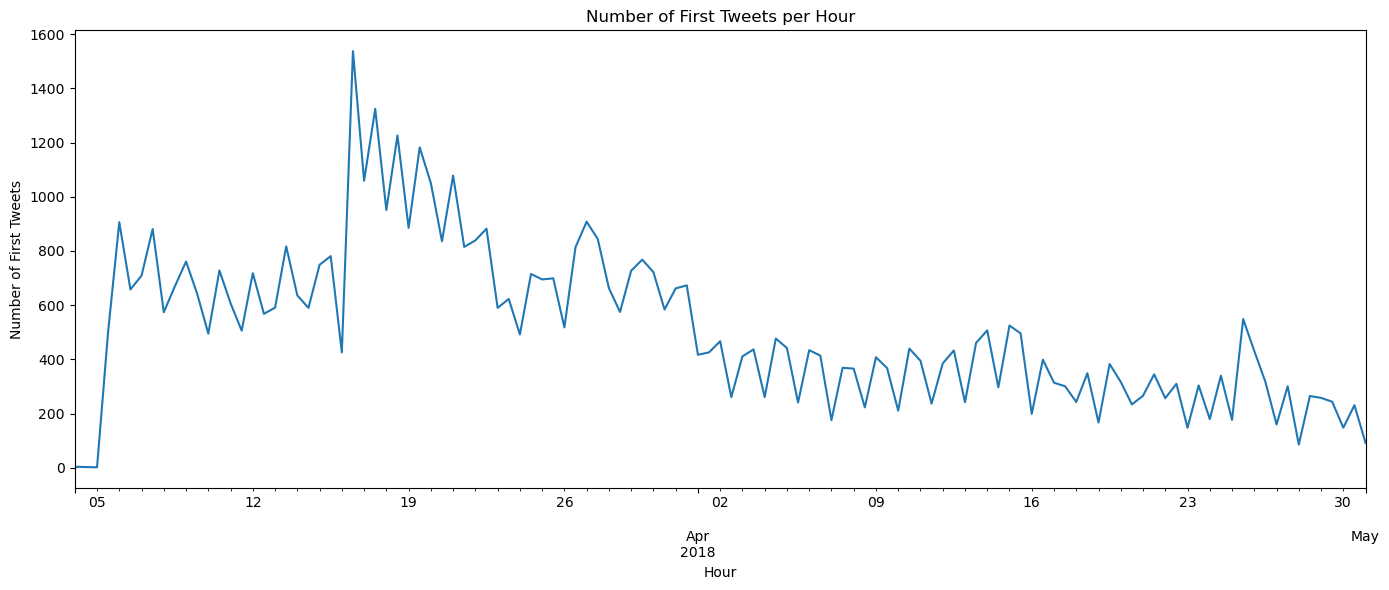

In [227]:
plt.figure(figsize=(14,6))
user_first_tweet.set_index('last_tweet').resample('12h').size().plot()
plt.xlabel('Hour')
plt.ylabel('Number of First Tweets')
plt.title('Number of First Tweets per Hour')
plt.tight_layout()
plt.show()

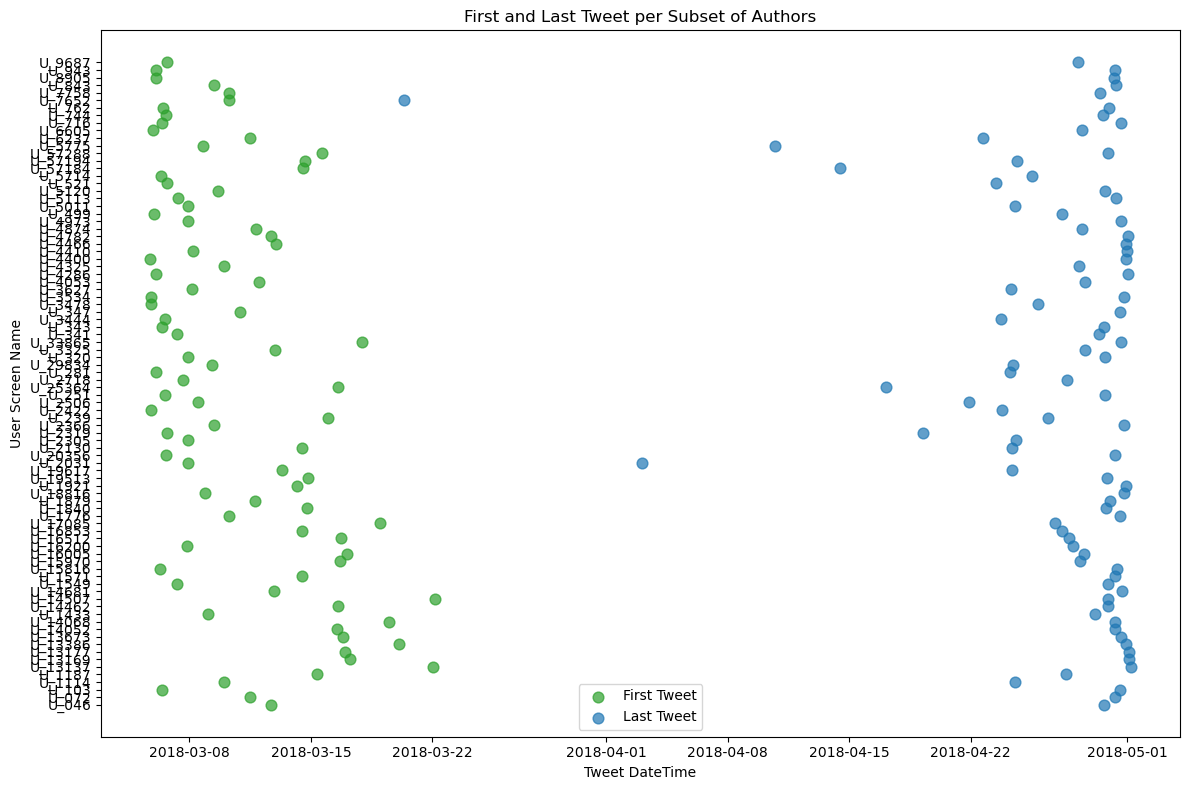

In [228]:
def plot_first_last_tweet_circles(user_subset, user_first_tweet, user_last_tweet_df):
    first_tweet_subset = user_first_tweet[user_first_tweet['author_sname'].isin(user_subset)]
    last_tweet_subset = user_last_tweet_df[user_last_tweet_df['author_sname'].isin(user_subset)]

    plt.figure(figsize=(12, 8))
    plt.scatter(first_tweet_subset['last_tweet'], first_tweet_subset['author_sname'], color='tab:green', label='First Tweet', alpha=0.7, s=60)
    plt.scatter(last_tweet_subset['last_tweet'], last_tweet_subset['author_sname'], color='tab:blue', label='Last Tweet', alpha=0.7, s=60)
    plt.xlabel('Tweet DateTime')
    plt.ylabel('User Screen Name')
    plt.title('First and Last Tweet per Subset of Authors')
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_first_last_tweet_circles(selected_users['author_sname'], user_first_tweet, user_last_tweet_df)

<Axes: xlabel='datetime'>

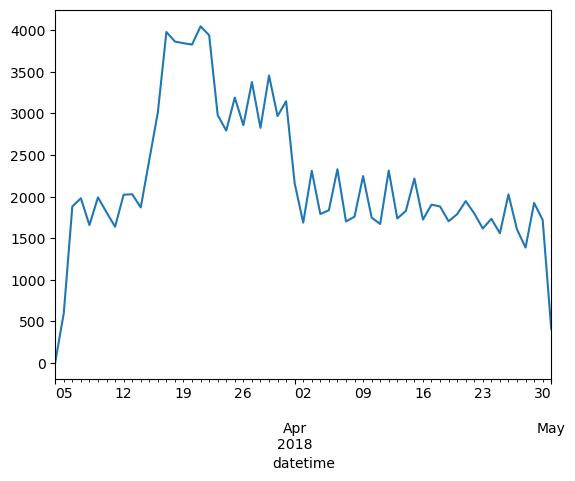

In [229]:
# Plot the tweet activity of whole dataset over time resampled by days.
df.set_index("datetime").resample("D").size().plot()

In [230]:
def get_last_tweet(user_subset):
    return user_last_tweet_df[user_last_tweet_df["author_sname"].isin(user_subset)]

filtered_last_tweet = get_last_tweet(selected_users["author_sname"])

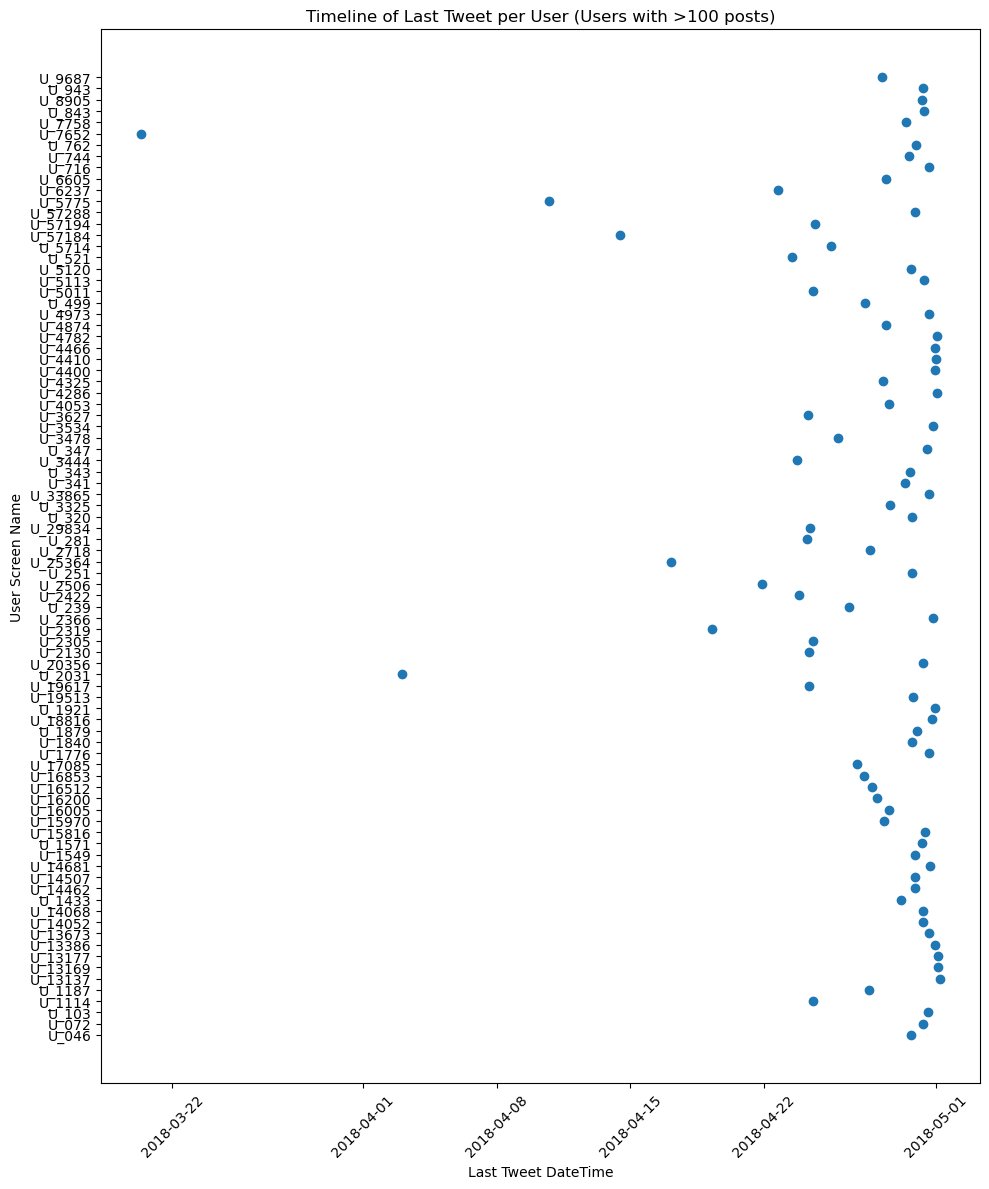

In [231]:
# Plot last tweet time of selected users
import matplotlib.dates as mdates
plt.figure(figsize=(10,12))
plt.scatter(filtered_last_tweet['last_tweet'], filtered_last_tweet['author_sname'])
plt.xlabel('Last Tweet DateTime')
plt.ylabel('User Screen Name')
plt.title('Timeline of Last Tweet per User (Users with >100 posts)')
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

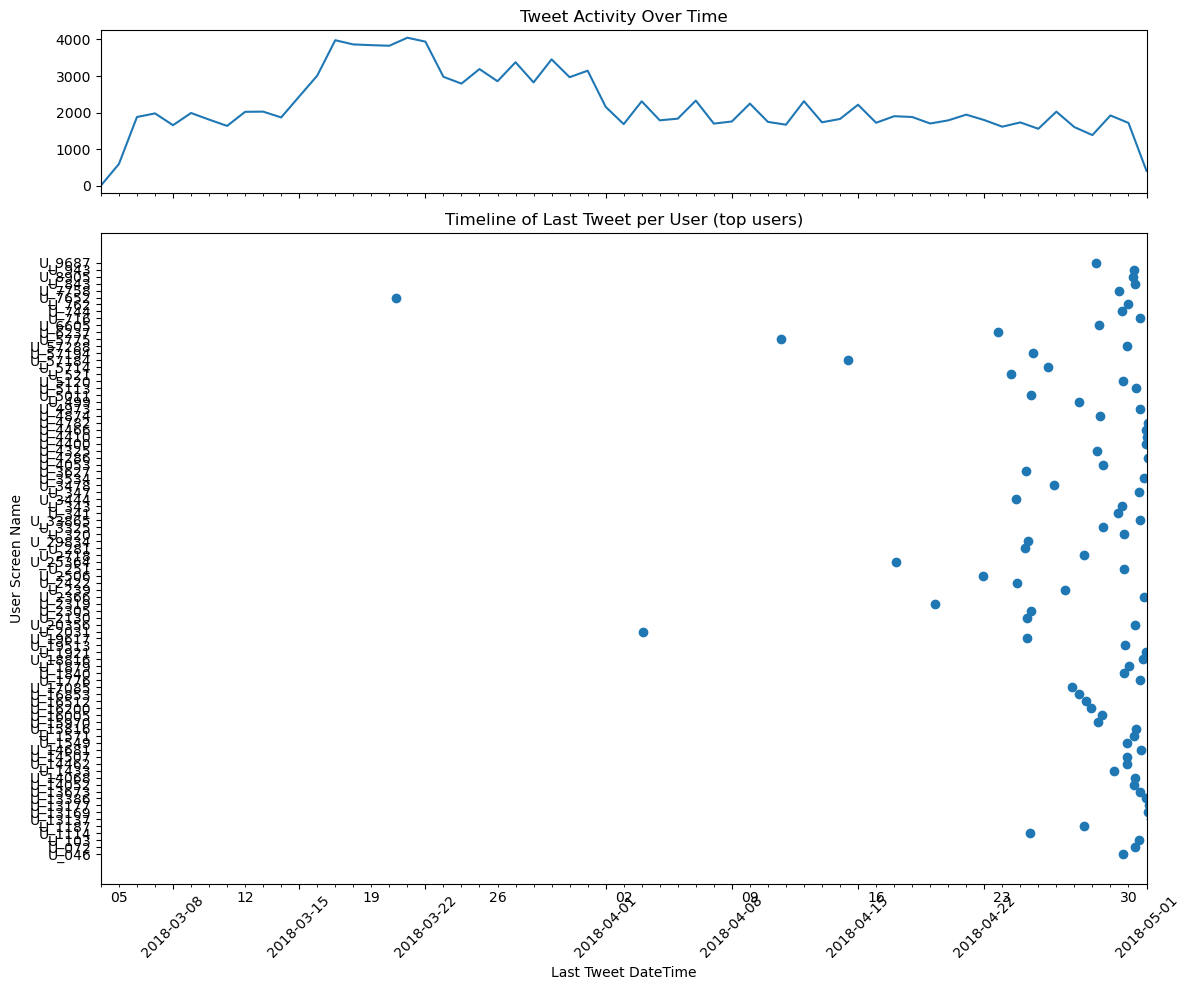

In [232]:
# combine above two graphs into one graph  with subplots. top subplot should be smaller.
fig, (ax1, ax2) = plt.subplots(2, 1, height_ratios=[1, 4], figsize=(12, 10), sharex=True)
# First subplot: Tweet activity over time
df.set_index("datetime").resample("D").size().plot(ax=ax1)
ax1.set_title('Tweet Activity Over Time')
# Second subplot: Last tweet time of selected users
ax2.scatter(filtered_last_tweet['last_tweet'], filtered_last_tweet['author_sname'])
ax2.set_xlabel('Last Tweet DateTime')
ax2.set_ylabel('User Screen Name')
ax2.set_title('Timeline of Last Tweet per User (top users)')
ax2.xaxis.set_major_locator(mdates.AutoDateLocator())
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\pog66\AppData\Local\Temp\ipykernel_40264\723855979.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(filtered_last_tweet['author_sname'], rotation=90)


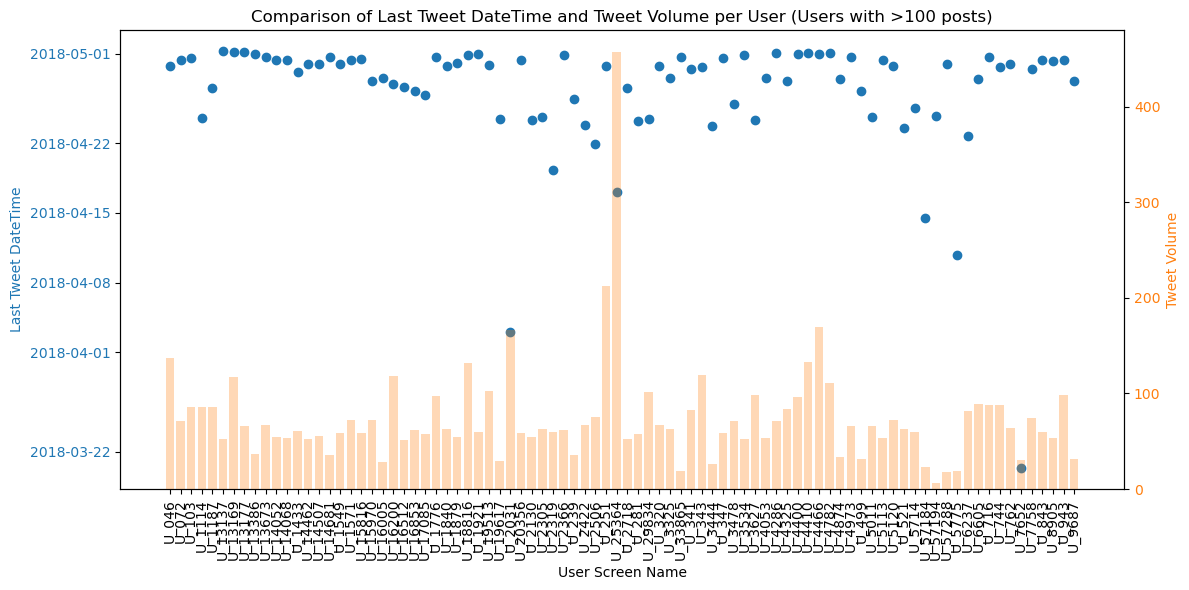

In [233]:
fig, ax1 = plt.subplots(figsize=(12,6))
color = 'tab:blue'
ax1.set_xlabel('User Screen Name')
ax1.set_ylabel('Last Tweet DateTime', color=color)
ax1.scatter(filtered_last_tweet['author_sname'], filtered_last_tweet['last_tweet'], color=color, label='Last Tweet')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticklabels(filtered_last_tweet['author_sname'], rotation=90)
ax2 = ax1.twinx()
color = 'tab:orange'
tweet_counts = selected_users.set_index('author_sname').loc[filtered_last_tweet['author_sname']]['post_count']
ax2.set_ylabel('Tweet Volume', color=color)
ax2.bar(filtered_last_tweet['author_sname'], tweet_counts, alpha=0.3, color=color, label='Tweet Volume')
ax2.tick_params(axis='y', labelcolor=color)
plt.title('Comparison of Last Tweet DateTime and Tweet Volume per User (Users with >100 posts)')
fig.tight_layout()
plt.show()

C:\Users\pog66\AppData\Local\Temp\ipykernel_40264\418407876.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(sorted_filtered_last_tweet['author_sname'], rotation=90)


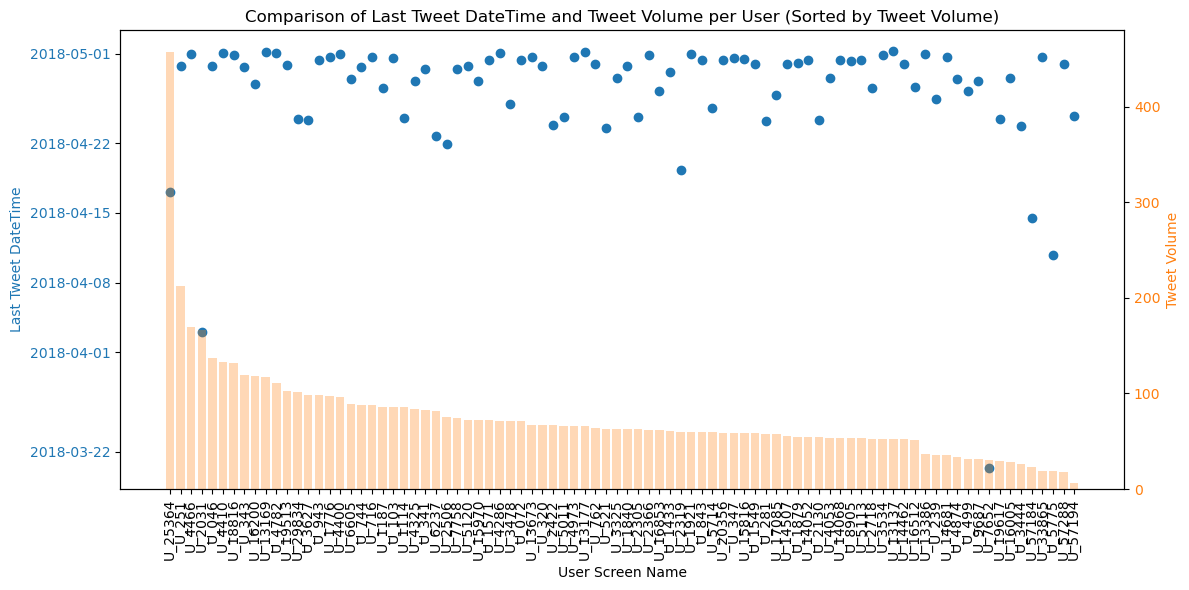

In [234]:
# Sort by tweet volume (number of tweets)
sorted_users = tweet_counts.sort_values(ascending=False).index
sorted_filtered_last_tweet = filtered_last_tweet.set_index('author_sname').loc[sorted_users].reset_index()
sorted_tweet_counts = tweet_counts.loc[sorted_users]
fig, ax1 = plt.subplots(figsize=(12,6))
color = 'tab:blue'
ax1.set_xlabel('User Screen Name')
ax1.set_ylabel('Last Tweet DateTime', color=color)
ax1.scatter(sorted_filtered_last_tweet['author_sname'], sorted_filtered_last_tweet['last_tweet'], color=color, label='Last Tweet')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticklabels(sorted_filtered_last_tweet['author_sname'], rotation=90)
ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('Tweet Volume', color=color)
ax2.bar(sorted_filtered_last_tweet['author_sname'], sorted_tweet_counts, alpha=0.3, color=color, label='Tweet Volume')
ax2.tick_params(axis='y', labelcolor=color)
plt.title('Comparison of Last Tweet DateTime and Tweet Volume per User (Sorted by Tweet Volume)')
fig.tight_layout()
plt.show()

In [235]:
date_posts = df.set_index('datetime').resample('d').size().sort_index().reset_index(name='count')
date_posts

,datetime,count
0,2018-03-04 00:00:00+00:00,9
1,2018-03-05 00:00:00+00:00,599
2,2018-03-06 00:00:00+00:00,1881
3,2018-03-07 00:00:00+00:00,1980
4,2018-03-08 00:00:00+00:00,1658
5,2018-03-09 00:00:00+00:00,1991
6,2018-03-10 00:00:00+00:00,1811
7,2018-03-11 00:00:00+00:00,1638
8,2018-03-12 00:00:00+00:00,2023
9,2018-03-13 00:00:00+00:00,2028


<Axes: xlabel='datetime'>

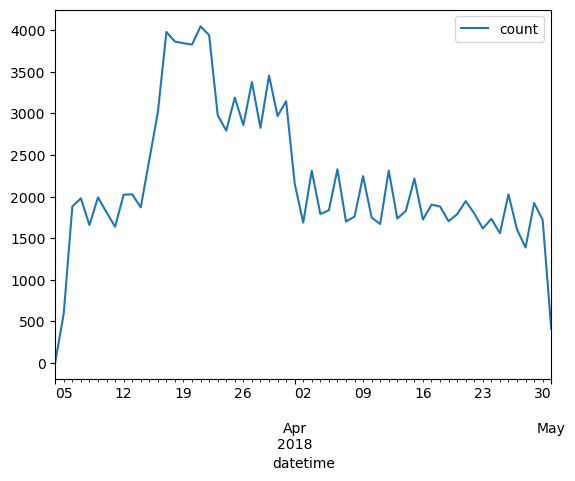

In [236]:
date_posts.set_index('datetime').plot()

In [237]:
filtered_rr_last_tweet = user_last_tweet_df[user_last_tweet_df["author_sname"].isin(selected_users_rr["author_sname"])]
sorted_rr_users = selected_users_rr.set_index('author_sname').sort_values(by='received_retweets_count', ascending=False).index

In [238]:
filtered_rr_last_tweet.set_index('author_sname')

,last_tweet
author_sname,
U_103,2018-04-30 14:13:58+00:00
U_1187,2018-04-27 12:20:30+00:00
U_13386,2018-04-30 22:57:20+00:00
U_14052,2018-04-30 07:49:24+00:00
U_14681,2018-04-30 16:37:50+00:00
U_15816,2018-04-30 10:07:11+00:00
U_16005,2018-04-28 13:08:08+00:00
U_16200,2018-04-27 21:45:51+00:00
U_16853,2018-04-27 06:03:57+00:00


In [239]:
filtered_last_tweet['author_sname']

45        U_046
71        U_072
432       U_103
1365     U_1114
2175     U_1187
          ...  
57538    U_7758
58277     U_843
58800    U_8905
59377     U_943
59660    U_9687
Name: author_sname, Length: 86, dtype: object

In [240]:
selected_users_rr

,author_sname,received_retweets_count
0,U_16200,118
1,U_4466,90
2,U_4400,85
3,U_15816,70
4,U_4410,70
5,U_20356,67
6,U_251,61
7,U_57288,57
8,U_2422,49
9,U_29834,48


<BarContainer object of 7 artists>

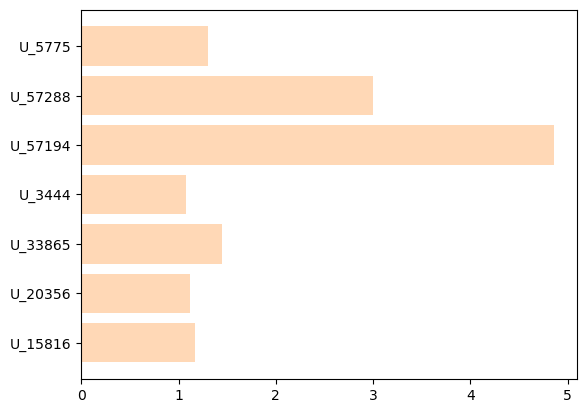

In [241]:
common_users = filtered_last_tweet['author_sname'][filtered_last_tweet['author_sname'].isin(selected_users_rrpp['author_sname'])]
plt.barh(
    common_users,
    selected_users_rrpp.set_index('author_sname').loc[common_users]['rr_per_post'],
    alpha=0.3,
    color=color,
    label='Tweet Volume'
)

In [242]:
# Sort by tweet volume (number of tweets)
# def plot_last_tweet_vs_volume(filtered_last_tweet, sorted_rr, date_posts):
#     intersect_users = [u for u in sorted_rr["author_sname"] if u in set(filtered_last_tweet["author_sname"])]
#     sorted_filtered_last_tweet = filtered_last_tweet.set_index('author_sname').loc[intersect_users].reset_index()
#     fig, ax1 = plt.subplots(figsize=(12,8))
#     color = 'tab:blue'
#     ax1.set_ylabel('User Screen Name')
#     ax1.set_xlabel('Last Tweet DateTime', color=color)
#     ax1.scatter(sorted_filtered_last_tweet['last_tweet'], sorted_filtered_last_tweet['author_sname'], color=color, label='Last Tweet')
#     ax1.tick_params(axis='x', labelcolor=color)
#     # Show every other user name for readability
#     yticks = ax1.get_yticks()
#     yticklabels = sorted_filtered_last_tweet['author_sname']
#     ax1.set_yticks(yticks)
#     ax1.set_yticklabels([name if i%2==0 else '' for i, name in enumerate(yticklabels)])
#     color = 'tab:green'
#     ax1.plot(date_posts['datetime'], date_posts['count']/100, color=color, label='Daily Tweet Count / 100')
#     ax1.legend(loc='upper left')
#     ax2 = ax1.twiny()
#     color = 'tab:orange'
#     ax2.set_xlabel('Tweet Volume', color=color)
#     common_users = filtered_last_tweet['author_sname'][filtered_last_tweet['author_sname'].isin(selected_users_rr['author_sname'])]
#     ax2.barh(
#         common_users,
#         selected_users_rrpp.set_index('author_sname').loc[common_users]['rr_per_post'],
#         alpha=0.3,
#         color=color,
#         label='Tweet Volume'
#     )
#     #ax2.barh(sorted_filtered_last_tweet['author_sname'], sorted_rr, alpha=0.3, color=color, label='Tweet Volume')
#     ax2.tick_params(axis='x', labelcolor=color)
#     plt.title('Comparison of Last Tweet DateTime and Tweet Volume per User')
#     fig.tight_layout()
#     plt.show()

# plot_last_tweet_vs_volume(filtered_rrpp_last_tweet, selected_users_rrpp, date_posts)

In [243]:
user_rrpp_valid

,author_sname,received_retweets_count,post_count,rr_per_post
52485,U_57194,34.0,6,4.857143
52589,U_57288,57.0,18,3.000000
53495,U_58103,6.0,1,3.000000
55183,U_59624,5.0,1,2.500000
54594,U_59094,5.0,1,2.500000
...,...,...,...,...
56844,U_7127,0.0,1,0.000000
56845,U_7128,0.0,16,0.000000
56846,U_7129,0.0,2,0.000000
56847,U_713,0.0,1,0.000000


In [244]:
selected_users_rrpp

,author_sname,received_retweets_count,post_count,rr_per_post
52485,U_57194,34.0,6,4.857143
52589,U_57288,57.0,18,3.000000
53495,U_58103,6.0,1,3.000000
55183,U_59624,5.0,1,2.500000
54594,U_59094,5.0,1,2.500000
...,...,...,...,...
6556,U_15816,70.0,59,1.166667
11595,U_20356,67.0,59,1.116667
52616,U_57311,10.0,8,1.111111
8436,U_1751,11.0,9,1.100000


In [245]:
filtered_last_tweet = get_last_tweet(selected_users_rrpp["author_sname"])

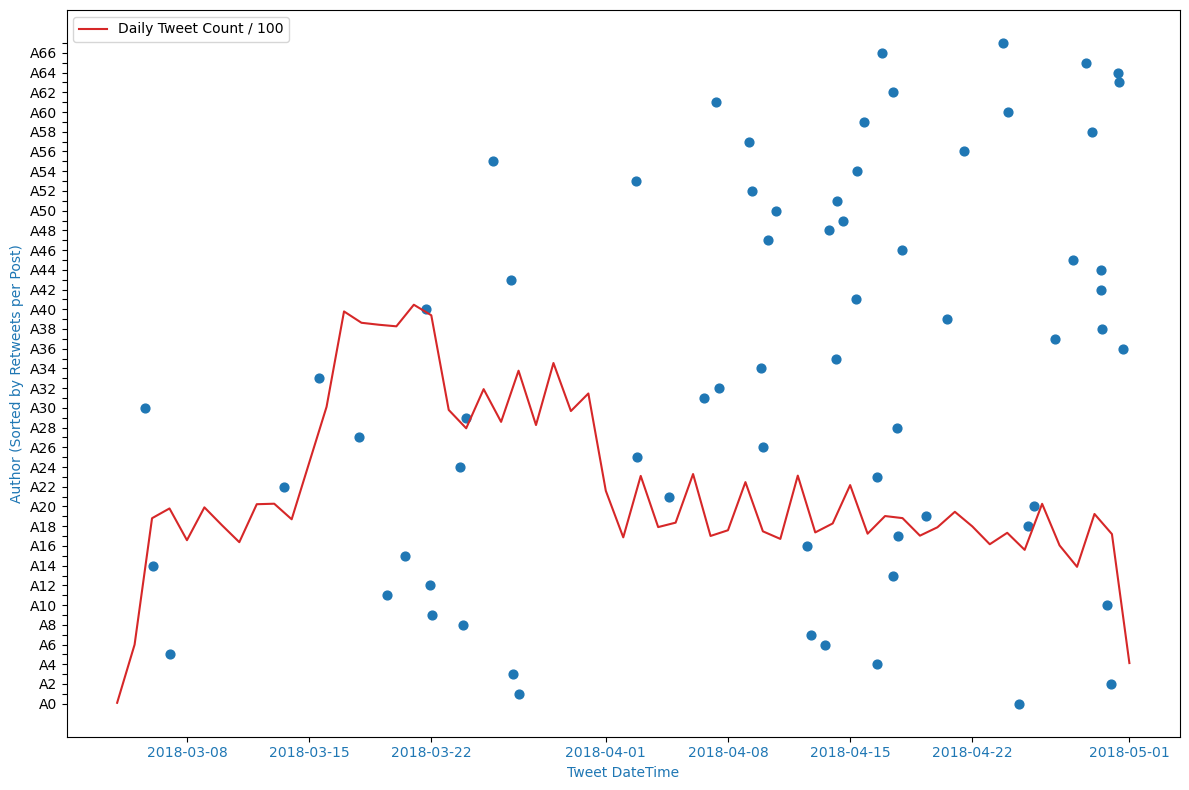

In [246]:
# Plot circles for last 10 tweets of each author
intersect_users = [u for u in user_rrpp["author_sname"] if u in set(filtered_last_tweet["author_sname"])]
sorted_filtered_last_tweet = filtered_last_tweet.set_index('author_sname').loc[intersect_users].reset_index()
sorted_rrpp = user_rrpp.set_index('author_sname').loc[intersect_users]['rr_per_post']
fig, ax1 = plt.subplots(figsize=(12,8))
color = 'tab:blue'
ax1.set_ylabel('Author (Sorted by Retweets per Post)', color=color)
ax1.set_xlabel('Tweet DateTime', color=color)
yticklabels = []
for i, author in enumerate(sorted_filtered_last_tweet['author_sname']):
    author_tweets = df[df['author_sname'] == author].sort_values('datetime', ascending=False).head(1)
    ax1.scatter(author_tweets['datetime'], [author]*len(author_tweets), color=color, alpha=1, s=40)
    yticklabels.append(author)
ax1.tick_params(axis='x', labelcolor=color)
# Show every other user name for readability
yticks = ax1.get_yticks()
ax1.set_yticks(yticks)
ax1.set_yticklabels([f"A{i}" if i%2==0 else '' for i, name in enumerate(yticklabels)])
color = 'tab:red'
ax1.plot(date_posts['datetime'], date_posts['count']/100, color=color, label='Daily Tweet Count / 100')
ax1.legend(loc='upper left')
fig.tight_layout()
plt.savefig("skripal_user_last_tweet_vs_rrpp.png", dpi=300)
plt.show()

In [247]:
sorted_users_rrpp = user_rrpp.set_index('author_sname').loc[intersect_users]['rr_per_post']
sorted_users_rrpp

author_sname
U_57194    4.857143
U_58103    3.000000
U_57288    3.000000
U_59624    2.500000
U_59094    2.500000
             ...   
U_15816    1.166667
U_20356    1.116667
U_57311    1.111111
U_1751     1.100000
U_3444     1.074074
Name: rr_per_post, Length: 68, dtype: float64

In [248]:
sorted_filtered_last_tweet

,author_sname,last_tweet
0,U_57194,2018-04-24 16:36:52+00:00
1,U_58103,2018-03-27 00:54:39+00:00
2,U_57288,2018-04-29 22:29:23+00:00
3,U_59624,2018-03-26 16:07:36+00:00
4,U_59094,2018-04-16 13:26:41+00:00
...,...,...
63,U_15816,2018-04-30 10:07:11+00:00
64,U_20356,2018-04-30 08:11:00+00:00
65,U_57311,2018-04-28 12:45:09+00:00
66,U_1751,2018-04-16 20:09:26+00:00


In [249]:
author_rrpp_data = pd.merge(sorted_users_rrpp, sorted_filtered_last_tweet, left_index=True, right_on='author_sname').sort_values(by='rr_per_post', ascending=False)
author_rrpp_data

,rr_per_post,author_sname,last_tweet
0,4.857143,U_57194,2018-04-24 16:36:52+00:00
2,3.000000,U_57288,2018-04-29 22:29:23+00:00
1,3.000000,U_58103,2018-03-27 00:54:39+00:00
3,2.500000,U_59624,2018-03-26 16:07:36+00:00
4,2.500000,U_59094,2018-04-16 13:26:41+00:00
...,...,...,...
63,1.166667,U_15816,2018-04-30 10:07:11+00:00
64,1.116667,U_20356,2018-04-30 08:11:00+00:00
65,1.111111,U_57311,2018-04-28 12:45:09+00:00
66,1.100000,U_1751,2018-04-16 20:09:26+00:00


In [250]:
before = []
after = []
for idx, row in author_rrpp_data.iterrows():
    author = row['author_sname']
    last_tweet = row['last_tweet']
    avg_posts_before = date_posts[date_posts['datetime'] <= last_tweet]['count'].mean()
    avg_posts_after = date_posts[date_posts['datetime'] > last_tweet]['count'].mean()
    before.append(avg_posts_before)
    after.append(avg_posts_after)
before_after_df = pd.DataFrame({'author_sname': author_rrpp_data['author_sname'], 'avg_posts_before': before, 'avg_posts_after': after})
before_after_df.dropna(inplace=True)
before_after_df

,author_sname,avg_posts_before,avg_posts_after
0,U_57194,2297.250000,1519.428571
2,U_57288,2244.929825,1066.000000
1,U_58103,2568.041667,1956.000000
3,U_59624,2532.869565,1995.472222
4,U_59094,2388.295455,1667.200000
...,...,...,...
63,U_15816,2235.879310,412.000000
64,U_20356,2235.879310,412.000000
65,U_57311,2250.660714,1352.000000
66,U_1751,2388.295455,1667.200000


In [251]:
from scipy.stats import wilcoxon
stat, p_val = wilcoxon(before_after_df['avg_posts_before'], before_after_df['avg_posts_after'], alternative="greater")
print("Wilcoxon statistic:", stat, "p-value:", p_val)


Wilcoxon statistic: 2088.0 p-value: 1.1224843405679994e-08
